In [1]:
%load_ext autoreload
%autoreload 2

from anndata import AnnData, read_h5ad
import scanpy as sc
import pandas as pd

datadir = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/zhang/"

# Load counts.h5ad

In [2]:
counts_adata = read_h5ad(f"{datadir}counts.h5ad")

counts = pd.DataFrame(
    counts_adata.X,
    columns=list(counts_adata.var_names),
    index=list(counts_adata.obs_names)
)

# Load cell_metadata

In [3]:
cell_metadata = pd.read_csv(
    f"{datadir}cell_metadata.csv",
).rename(columns={"Unnamed: 0": "point"}).set_index('point')

In [4]:
cell_metadata.head()

,fovID,fov_x,fov_y,volume,center_x,center_y,slice_id,sample_id,label,subclass,class_label
point,,,,,,,,,,,
10000143038275111136124942858811168393,13,4539.310,2986.899,992.830060,4738.397298,3075.327399,mouse2_slice31,dataset2_sample4,Astro_1,Astrocytes,Other
100001798412490480358118871918100400402,290,-4016.860,1404.780,610.091871,-3964.711404,1451.889047,mouse2_slice160,dataset2_sample5,Endo,Endothelial,Other
100006878605830627922364612565348097824,113,750.406,1143.102,148.277718,805.843523,1215.035473,mouse2_slice109,dataset2_sample6,SMC,SMC,Other
100007228202835962319771548915451072492,432,1262.680,-3752.030,249.515471,1348.686198,-3589.955255,mouse1_slice71,dataset1_sample2,Endo,Endothelial,Other
100009332472089331948140672873134747603,354,-3627.450,-1987.730,1779.831996,-3584.650904,-1883.105955,mouse2_slice219,dataset2_sample5,L23_IT_3,L23_IT,Glutamatergic


In [5]:
## splitting identifiers for mouse, slice, dataset and sample
cell_metadata[['mouse', 'slice']] = cell_metadata['slice_id'].str.split('_', 1, expand=True)
cell_metadata[['dataset', 'sample']] = cell_metadata['sample_id'].str.split('_', 1, expand=True)

In [6]:
cell_metadata.head()

,fovID,fov_x,fov_y,volume,center_x,center_y,slice_id,sample_id,label,subclass,class_label,mouse,slice,dataset,sample
point,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,13,4539.310,2986.899,992.830060,4738.397298,3075.327399,mouse2_slice31,dataset2_sample4,Astro_1,Astrocytes,Other,mouse2,slice31,dataset2,sample4
100001798412490480358118871918100400402,290,-4016.860,1404.780,610.091871,-3964.711404,1451.889047,mouse2_slice160,dataset2_sample5,Endo,Endothelial,Other,mouse2,slice160,dataset2,sample5
100006878605830627922364612565348097824,113,750.406,1143.102,148.277718,805.843523,1215.035473,mouse2_slice109,dataset2_sample6,SMC,SMC,Other,mouse2,slice109,dataset2,sample6
100007228202835962319771548915451072492,432,1262.680,-3752.030,249.515471,1348.686198,-3589.955255,mouse1_slice71,dataset1_sample2,Endo,Endothelial,Other,mouse1,slice71,dataset1,sample2
100009332472089331948140672873134747603,354,-3627.450,-1987.730,1779.831996,-3584.650904,-1883.105955,mouse2_slice219,dataset2_sample5,L23_IT_3,L23_IT,Glutamatergic,mouse2,slice219,dataset2,sample5


# Preprocessing

In [7]:
adata = AnnData(
    X=counts,
    obs=cell_metadata
)

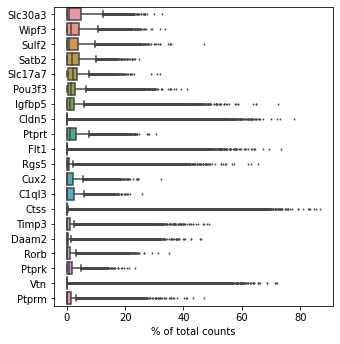

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [10]:
adata.obs.dtypes

fovID            int64
fov_x          float64
fov_y          float64
volume         float64
center_x       float64
center_y       float64
slice_id        object
sample_id       object
label           object
subclass        object
class_label     object
mouse           object
slice           object
dataset         object
sample          object
dtype: object

In [11]:
adata.obs[
    ['fovID', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'mouse', 'slice', 'dataset', 'sample']
] = adata.obs[
    ['fovID', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label', 'mouse', 'slice', 'dataset', 'sample']
].astype('category')

In [12]:
adata.obs.dtypes

fovID          category
fov_x           float64
fov_y           float64
volume          float64
center_x        float64
center_y        float64
slice_id       category
sample_id      category
label          category
subclass       category
class_label    category
mouse          category
slice          category
dataset        category
sample         category
dtype: object

# Write file

In [13]:
adata.write(f"{datadir}preprocessed_zhang.h5ad")